# XOR problem using tensorflow

Last time we looked at "manually" training a small network without using any deep learning library. Now we'll redo the same exercise using tensorflow.

We're still trying to approximate the same XOR function

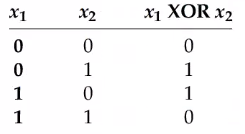


Using the same network architecture:

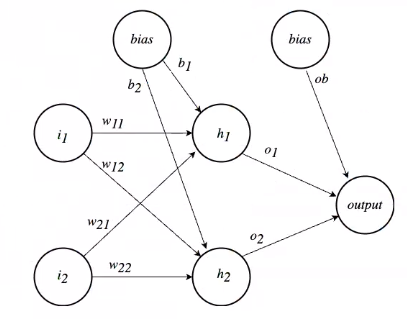

In [1]:
import tensorflow as tf
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Data. Tensorflow wants the input to be in numpy arrays.
inputs = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
outputs = np.array([[0], [1], [1], [0]], dtype=np.float32)


In [2]:
# ------- Create the model.-----------
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)), # Input layer consisting of 2 nodes.
    tf.keras.layers.Dense(2, activation='sigmoid'), # Hidden layer consisting of 2 nodes using sigmoid activation funciton.
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer consisting of 1 node using sigmoid activation function.
])

# ---------- Compile the model. -----------
learning_rate = 0.2
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['accuracy'])


Dense layer means fully connected layer. It is the only one we've covered so far but later in this course well talk about other types of layers and what they can be used for. We're also using tf.keras.Sequential model, which connects all the defined layers into a network. The sequential model is easy to use and linear (it has 1 input tensor and 1 output tensor, it doesn't branch into other structures which more complicated models can do).

We're also using an optimizer with tensorflow, here "Adam". This is an algoritm to make gradient descent better, we'll talk more about optimizers in a later lecture.


In [3]:
# Train the model
model.fit(inputs, outputs, epochs=10000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(inputs, outputs)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(inputs)
for i in range(len(inputs)):
    print(f'Input: {inputs[i]}, Expected: {outputs[i][0]}, Predicted: {predictions[i][0]:.4f}, which is {"correct" if round(predictions[i][0])==outputs[i][0] else "incorrect"}')


1/1 [==============================] - 0s 120ms/step - loss: 1.4450e-07 - accuracy: 1.0000
Loss: 1.4449894081280945e-07, Accuracy: 1.0
1/1 [==============================] - 0s 82ms/step
Input: [0. 0.], Expected: 0.0, Predicted: 0.0004, which is correct
Input: [0. 1.], Expected: 1.0, Predicted: 0.9996, which is correct
Input: [1. 0.], Expected: 1.0, Predicted: 0.9997, which is correct
Input: [1. 1.], Expected: 0.0, Predicted: 0.0004, which is correct
